
 Numpy
  - Vectorization
  - Boardcast
  - Identify Matrix
  - Indexing and Slicing
  - Fancy Array
  - Reduction Operation

# Basic Section (Start)


In [2]:
import numpy as np

## Numpy (Review)

Main object type is `np.array`

Many ways to create it,

One way is to convert a python list

In [4]:
python_list = [1, 2, 3]
arr = np.array(python_list)
arr

array([1, 2, 3])

In [5]:
arr**2

array([1, 4, 9])

In [ ]:
python_list**2 #__pow__

In [10]:
# class.function(self, args) = instance.function(args)

In [ ]:
# Magic Function with __XXX__
# arr.__pow__(2)
python_list.__pow__(2)

Many times a list comprehension is used to create a list and then converted to a array

In [8]:
python_list_pow = [i**2 for i in python_list]  # list comprehension
python_list_pow

[1, 4, 9]

In [13]:
# Extend the behavior of built-in class use inheritance
# not directly changing it
class PowerList(list):
    def __pow__(self, exponent):
        print("I am called __pow___ for powerlist")
        if not isinstance(exponent, int):
            raise ValueError("Exponent must be an integer")
        return [i**2 for i in self]

my_list = PowerList()
my_list.extend([1,2,3])
print("Original list:", my_list)

powered_list = my_list ** 2
print("List to the power of 2:", powered_list)



Original list: [1, 2, 3]
I am called __pow___ for powerlist
List to the power of 2: [1, 4, 9]


### Exercise (Pre-Lec)
Create a numpy array that contain  intergers i  such that  0<i<100 and $2^i$ has the last digit 6

In [17]:
possible_list=[]
for i in range(1,100):
    if 2**i % 10 == 6:
        possible_list.append(i)

possible_arr = np.array(possible_list)
print(possible_arr)

[ 4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96]


Create a 2D numpy array $A$ (5,10) such that $A_{ij} = i\times j$

In [56]:
A1=[]
for i in range(1,6):
    for j in range(1,11):
        A1.append(i*j)
A1 = np.array(A1).reshape(5,10)
print(A1)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]
 [ 5 10 15 20 25 30 35 40 45 50]]


## Another way to create a numpy array is with initializing functions

- np.zeros
- np.ones
- np.arange

These functions along with `reshape` can be used to create initial matrix without any for loops

In [ ]:
np.zeros(shape = (10, 10))

In [ ]:
np.ones((10, 10)) * 2

In [ ]:
np.arange(2, 10, 2)  # equivalent to range(2,10,2)

### Exercise (In Lec)

Create an array of first 10 powers of 2

In [23]:
powers_of_2 = 2 ** np.arange(10)
print(powers_of_2)

[  1   2   4   8  16  32  64 128 256 512]


### 1D vs 2D array

In [29]:
array1D = np.arange(10) * np.arange(10)
array1D = array1D.reshape(1,-1)
print(array1D.shape)
array1D

(1, 10)


array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [ ]:
array2D = np.arange(10).reshape(10, 1)
print(array2D.shape)
array2D

In [26]:
array2D + array1D #boardcasting

array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81],
       [ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82],
       [ 2,  3,  6, 11, 18, 27, 38, 51, 66, 83],
       [ 3,  4,  7, 12, 19, 28, 39, 52, 67, 84],
       [ 4,  5,  8, 13, 20, 29, 40, 53, 68, 85],
       [ 5,  6,  9, 14, 21, 30, 41, 54, 69, 86],
       [ 6,  7, 10, 15, 22, 31, 42, 55, 70, 87],
       [ 7,  8, 11, 16, 23, 32, 43, 56, 71, 88],
       [ 8,  9, 12, 17, 24, 33, 44, 57, 72, 89],
       [ 9, 10, 13, 18, 25, 34, 45, 58, 73, 90]])

### Distinction between numpy 1D arrays and numpy 2D arrays

This tends to cause a lot of confusion for new numpy users.
Follow the below examples carefully to understand the distinction.

In [ ]:
Z = np.zeros(shape=10)
print(Z)
Z.shape

In [ ]:
# Create 2D array by reshape
Z = np.zeros(10).reshape(10, 1)
print(Z)
Z.shape

In [ ]:
Z.squeeze()  # remove axis with length = 1

In [31]:
# squeeze Remove axes of length one
Z = np.zeros(6).reshape(1, 1, 2, 3)
print(Z)
print(Z.shape, "\n")

Z_squeeze = Z.squeeze()
print(Z_squeeze)
print(Z_squeeze.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]]]]
(1, 1, 2, 3) 

[[0. 0. 0.]
 [0. 0. 0.]]
(2, 3)


In [32]:
# Matrix Multiplication
Mat = np.random.randn(10, 10)
Mat.shape

(10, 10)

In [33]:
Z = np.arange(10).reshape(10, 1)
print(Z)
print(Z.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [34]:
# (N, M) @ (M, K) = (N, K)
Mat @ Z

array([[-24.13656793],
       [ 29.96306242],
       [ -7.46789439],
       [ -2.70103837],
       [ 35.09858283],
       [ 22.86389269],
       [ -4.72878917],
       [ -2.70752154],
       [  6.16600193],
       [ -7.01718246]])

In [ ]:
Z = np.arange(10).reshape(1, 10)

print(Mat.shape)
print(Z.shape)

# (N, M) @ (M, K) = (N, K)
Mat @ Z  # (10, 10) @ (1, 10) NOT WORKING

In [36]:
(Z @ Mat).shape

(1, 10)

In [47]:
# array variable is also a pointer
x = np.zeros((5, 5))
y = x.copy()
z = x
x[1, 1] = 2

print("x:\n", x)
print("y:\n", y)
print("z:\n", z)

x:
 [[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
y:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
z:
 [[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Array Broadcasting

Normally you only do arithmetic operations between arrays of the same dimension

The smaller array of at least 1 dimension of size 1 is “broadcast” across the larger array so that they have compatible shapes by dimension.

In [48]:
a = np.arange(3).reshape(1, 3)
b = np.arange(6).reshape(6, 1)
c = np.ones((3, 3))
d = np.zeros((6, 3))
print(a, "\n")
print(b, "\n")
print(c, "\n")
print(d, "\n")

[[0 1 2]] 

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [ ]:
# c + 2
# c + c
# d + a
# c + d
b + d

In [ ]:
a + b

In [ ]:
X = np.arange(4).reshape(-1, 1) * 10
Y = np.arange(3).reshape(1, -1)
print(X.shape)
print(Y.shape, "\n")
print(X, "\n")
print(Y, "\n")
X + Y

it tries to duplicates every x’s col and y’s row (dim size = 1) to match the other arrays
1. Make the two arrays have the same number of dimensions.
  - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

![](http://scipy-lectures.org/_images/numpy_broadcasting.png)

### Exercise (In-Lecture)
create a 2D numpy array $A$ (shape = (5,10) ) such that $A_{ij} = i\times j$, but without using list comprehensions. Use broadcasting instead


In [59]:
# hint: check how it looks for
#       np.arange(5).reshape(-1,1)
#       np.arange(10).reshape(1,-1)
A1 = np.arange(5).reshape(-1, 1) * np.arange(10).reshape(1, -1)
B = np.arange(5).reshape(-1, 1)
C = np.arange(10).reshape(1, -1)
print(A1,"\n")
print(B @ C)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]] 

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]]


Use array broadcasting to create a (10,10) numpy array with values
$$ A_{ij} = 2^i + j $$

In [60]:
# Hint: Check the values of
#       2**(np.arange(10).reshape(-1,1))
#       np.arange(10).reshape(1,-1)
A2 = 2**(np.arange(10).reshape(-1,1) + np.arange(10).reshape(1,-1))
print(A2)

[[     1      2      4      8     16     32     64    128    256    512]
 [     2      4      8     16     32     64    128    256    512   1024]
 [     4      8     16     32     64    128    256    512   1024   2048]
 [     8     16     32     64    128    256    512   1024   2048   4096]
 [    16     32     64    128    256    512   1024   2048   4096   8192]
 [    32     64    128    256    512   1024   2048   4096   8192  16384]
 [    64    128    256    512   1024   2048   4096   8192  16384  32768]
 [   128    256    512   1024   2048   4096   8192  16384  32768  65536]
 [   256    512   1024   2048   4096   8192  16384  32768  65536 131072]
 [   512   1024   2048   4096   8192  16384  32768  65536 131072 262144]]


# Basic Section (End)

## Matrix creation

There are some functions to create standard matrices

In [61]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [62]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
# np.diag: Extract a diagonal or construct a diagonal array.
M = np.diag(np.arange(10))  # .reshape(5,20)
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [66]:
np.diag(M)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
# Transpose of the matrix
A = np.arange(15).reshape(5, 3)
print(A.shape)
A

(5, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [68]:
A.T

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [69]:
A.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

### random seed

In [83]:
np.random.rand(5, 5)

array([[0.60639321, 0.0191932 , 0.30157482, 0.66017354, 0.29007761],
       [0.61801543, 0.4287687 , 0.13547406, 0.29828233, 0.56996491],
       [0.59087276, 0.57432525, 0.65320082, 0.65210327, 0.43141844],
       [0.8965466 , 0.36756187, 0.43586493, 0.89192336, 0.80619399],
       [0.70388858, 0.10022689, 0.91948261, 0.7142413 , 0.99884701]])

In [80]:
np.random.seed(0)  # control the random state
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]
[[0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]]
[[0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]]


### Exercise (Post Lecture)

Create this matrix   

```python
array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])
```

In [85]:
this_matrix = np.diag(np.array([4,3,2,1,0,-1,0,1,2,3,4],dtype=float)) + 1
this_matrix

array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])

## Array Indexing and Slicing

In [86]:
import numpy as np

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
arr[5]

np.int64(5)

In [88]:
arr[-3]

np.int64(7)

In [89]:
arr[3:7]

array([3, 4, 5, 6])

In [90]:
arr[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
arr[0:-3]

array([0, 1, 2, 3, 4, 5, 6])

In [92]:
arr[0:6:2]  # similar as range(0,6,2)

array([0, 2, 4])

In [93]:
arr[5:0:-2]

array([5, 3, 1])

In [94]:
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [95]:
arr[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
print(a)
a[4:, 4:]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


array([[44, 45],
       [54, 55]])

Can use all the above slicing methods for each dimension of a multidemnsional array
![](http://scipy-lectures.org/_images/numpy_indexing.png)

try it yourself

### Exercise (Post-Lecture)
Create the following matrix, using `np.ones()`, `np.zeros()`, and slicing
```python
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
```

In [100]:
M_79 = np.ones((10,10))
M_79[2:8, 2:8] = np.zeros((6,6))
M_79

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Create the following matrix
```python
array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])
```

In [105]:
M_81 = np.ones((10,10))
M_81 = M_81 * -1
M_81[1:9, 1:6] = np.arange(0,40).reshape(8,5)
M_81

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

# Fancy Array Indexing

We can use numpy arrays as an index for other numpy arrays

In [106]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
# use array/list/tuple as indexs
idx = np.array([2, 7, -1])
idx

array([ 2,  7, -1])

In [108]:
print(arr[idx])
arr[idx] = -1
arr

[2 7 9]


array([ 0,  1, -1,  3,  4,  5,  6, -1,  8, -1])

In [109]:
# use bool array
arr < 0

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [110]:
arr[arr < 0] = 100
arr

array([  0,   1, 100,   3,   4,   5,   6, 100,   8, 100])

**For multidimensional array, array indexing works different from slicing**

In [111]:
X = np.zeros((6, 6))
X[2:5, 0:3] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [112]:
np.arange(2, 5), np.arange(0, 3)

(array([2, 3, 4]), array([0, 1, 2]))

In [113]:
X = np.zeros((6, 6))
X[np.arange(2, 5), np.arange(0, 3)] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [114]:
# Here is our array, what should we return?
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [115]:
a[(1, 2, 3, 4, 5), (0, 1, 2, 3, 4)]

array([10, 21, 32, 43, 54])

In [116]:
a[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [117]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
print(mask)
a[mask, 2]

[ True False  True False False  True]


array([ 2, 22, 52])

In [ ]:
mask = np.array([1,0,1,0,0,1])
a[mask,2]

![](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

### Exercise (Post - Lecture)
Create the following matrix
```python
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
```

In [126]:
M_99 = np.zeros((10,10))
M_99[np.arange(10),np.array([9,7,5,3,1,1,3,5,7,9])] = 1
M_99

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Exercise (Post Lecture)
Write a function to compute the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of a square numpy array using fancy array indexing. Compare your implementation to numpy's built-in function `np.trace`.

In [129]:
def trace(a):
  if a.shape[0] != a.shape[1]:
      print("Input must be a square matrix")
      sum_diag = 0
  else:
      sum_diag = 0
      for i in range(a.shape[0]):
          sum_diag += a[i, i]
      # 也可以这样：
      # m_102 = a.diagonal()
      # sum_diag = m_102.sum()
  return sum_diag
trace(a) == np.trace(a)

np.True_

We can use `np.where`, to get indices of the `True` values in a boolean array

In [132]:
Y = np.arange(25).reshape(5, 5)
print(Y,"\n")
Y > 14
print(np.where(Y > 14))
print()
print(Y[np.where(Y > 14)])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

(array([3, 3, 3, 3, 3, 4, 4, 4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

[15 16 17 18 19 20 21 22 23 24]


## Reduction operations

Many reduction functions are available

- np.sum, np.prod
- np.min, np.max
- np.any, np.all

Partial reductions

- np.cumsum, np.cumprod

In [133]:
X = np.arange(50).reshape(10,5)
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [134]:
np.sum(X), np.prod(X)
# class.method(self)

(np.int64(1225), np.int64(0))

The way to understand the “axis” of numpy sum is it collapses the specified axis. So when it collapses the axis 0 (row), it becomes just one row and column-wise sum.

In [135]:
# sum of the rows
np.sum(X, axis=1)

array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235])

In [136]:
X.sum(axis=1)

array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235])

In [137]:
np.min(X), np.max(X)

(np.int64(0), np.int64(49))

In [138]:
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [139]:
np.min(X, axis=0)

array([0, 1, 2, 3, 4])

In [140]:
Y = X < 12
Y

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [141]:
np.any(Y, axis=1)

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [142]:
np.all(Y, axis=1)

array([ True,  True, False, False, False, False, False, False, False,
       False])

All the above functions can be called on the array object directly

In [ ]:
# instance.method(args) = class.method(instance, args)
X.max(axis=0)

In [143]:
# np.cumsum
Y = np.arange(10)
print(Y)
np.cumsum(Y)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [144]:
X = np.arange(16).reshape(4, 4)
print(X)
np.cumsum(X, axis=1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]])

Cumulative operations don't change the shape of the array

### Exercise (Post Lecture)

- Find the column with maximum column sum
- For which rows of the matrix, the sum of the first three elements of the row is greater than the sum of the last two elements of the row

In [154]:
column_sum = X.sum(axis=0)
# print(column_sum,"\n")
max_idx = np.argmax(column_sum)
print("最大列和的索引:", max_idx)

sum_first3 = X[:, :3].sum(axis=1)
sum_last2 = X[:, -2:].sum(axis=1)
rows = np.where(sum_first3 > sum_last2)[0]
print("满足条件的行索引:", rows)

最大列和的索引: 3
每行前3个元素的和: [ 3 15 27 39]
满足条件的行索引: [1 2 3]


### Exercise (Post Lecture)
Compute the the moving average of the array `y` created below, with window size 5.

[ 2.71320643e-01 -2.07927407e-01 -7.42791724e-02  1.74524710e-01
  1.73031722e-01 -1.02171632e-01 -4.04108767e-01 -1.43578055e-01
 -4.74467219e-01 -8.86127404e-01 -7.00767586e-01 -2.47374240e-01
 -7.43425973e-01 -7.31233710e-01 -4.18612748e-01 -3.06086682e-01
 -8.43313642e-02 -2.92455296e-01  1.25318826e-01  3.39894610e-01
  3.82438978e-01  2.46090255e-02 -1.02050214e-01  7.20834006e-02
  1.39165750e-02 -5.20694316e-02  6.56975468e-02  7.88357894e-02
  2.29232971e-01  3.30271925e-01  6.35495122e-01  6.57142274e-01
  1.06579115e+00  8.85027244e-01  4.75486593e-01  2.76186650e-01
 -1.09828988e-01  2.18852338e-01 -2.34251343e-01 -1.07964194e-01
 -6.03780385e-02  2.58908957e-01 -4.21435032e-02  3.14706799e-01
  1.66359439e-01  4.21007130e-01  2.16968837e-01  6.00905317e-01
  4.26416955e-01  9.14328522e-02 -1.60379038e-02 -4.22577529e-01
 -1.01471871e-01 -4.50319852e-01 -5.66205403e-01 -1.21944691e-01
  3.65680784e-01  3.21985331e-01  6.48108175e-01  3.99482309e-01
  4.96853957e-01  8.99685

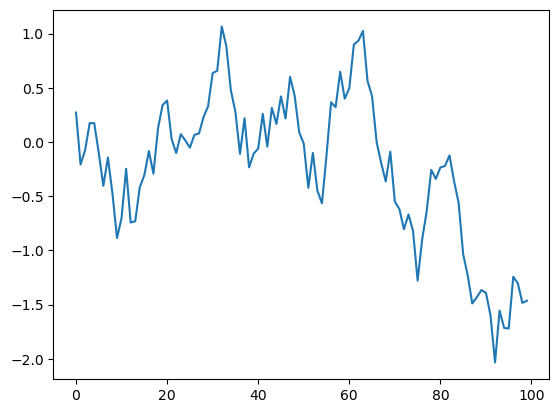

In [164]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
y = np.cumsum(np.random.rand(100) - 0.5)
print(y)
plt.plot(y)

In [ ]:



# plt.plot(y)
# plt.plot(z)

## Final Exercise (Post Lecture)

Implement the [Conway's game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy

TypeError: object of type 'function' has no len()

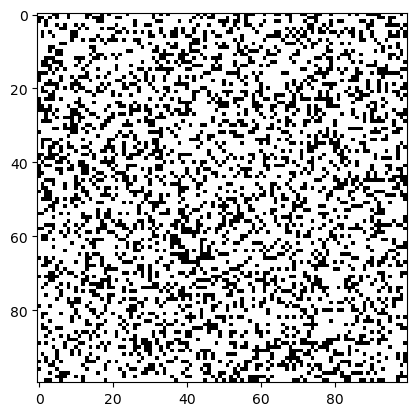

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

n = 100
grid = np.random.choice([1, 0], size=(n, n), p=[0.3, 0.7])
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='binary')

def new_grid(frame):
    global grid
    # 计算每个细胞的活邻居数量
    neighbors = (
        grid[:-2, :-2] + grid[:-2, 1:-1] + grid[:-2, 2:] +
        grid[1:-1, :-2] +                 grid[1:-1, 2:] +
        grid[2:, :-2] + grid[2:, 1:-1] + grid[2:, 2:]
    )
    # 条件1: 细胞当前为活，并且有2或3个邻居
    condition1 = (grid[1:-1, 1:-1] == 1) & ((neighbors == 2) | (neighbors == 3))
    # 条件2: 细胞当前为死，并且有3个邻居
    condition2 = (grid[1:-1, 1:-1] == 0) & (neighbors == 3)
    new_grid = condition1 | condition2
    new_grid = new_grid.astype(int)

    grid[:] = 0
    grid[1:-1, 1:-1] = new_grid
    img.set_array(grid)
    return [img]

ani = FuncAnimation(fig, new_grid, frames=2000, interval=10, blit=True)
plt.show()

